## Predicting COVID fatality

#### Background:
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

#### Objective:
* The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

#### Content: 
In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

#### Source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset

#### ==============================================================================================================

In [68]:
import warnings
warnings.filterwarnings('ignore')

# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [69]:
covid_df = pd.read_csv(Path('Covid_Data.csv'))
covid_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [70]:
# Applying the condition-Outcome column
covid_df['DATE_DIED'] = ['0' if DATE_DIED == '9999-99-99' else '1' for DATE_DIED in covid_df['DATE_DIED']]
covid_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,1,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,0,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,0,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,0,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,0,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [71]:
# Generate our categorical variable list
covid_df.dtypes[covid_df.dtypes == "object"].index.tolist()

['DATE_DIED']

In [72]:
# Replace missing data (97 and 98) with zero .
covid_df["PREGNANT"] = covid_df["PREGNANT"].replace([97,98], [0,0])
#covid_df.loc[covid_df["PREGNANT"] == "97", "PREGNANT"] = 0

In [73]:
covid_df.head(100)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,0,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,1,2,55,0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,1,97,2,68,0,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,0,97,2,49,2,2,...,2,2,2,2,2,2,2,2,7,97
96,2,1,1,1,0,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
97,2,1,2,1,0,97,2,28,0,2,...,2,2,2,2,2,2,2,2,7,97
98,2,1,2,1,0,97,2,27,0,2,...,2,2,2,2,2,2,2,1,7,97


In [74]:
# Drop NA values(values>2)and column with too much missing values
#covid_df = covid_df.drop(covid_df[covid_df["PREGNANT"] > 2].index)
covid_df = covid_df.drop(covid_df[covid_df["CLASIFFICATION_FINAL"] >= 4].index)

In [75]:
# Feature grouping 
#covid_df = covid_df.drop(["PNEUMONIA","COPD","ASTHMA","CARDIOVASCULAR"], axis = 1)
#covid_df = covid_df.drop(["INMSUPR","HIPERTENSION","RENAL_CHRONIC","DIABETES","OTHER_DISEASE"], axis = 1)
#covid_df = covid_df.drop(["SEX","AGE","PREGNANT","TOBACCO","CLASIFFICATION_FINAL"], axis = 1)

In [76]:
# Drop features with least importance
covid_df = covid_df.drop(["INTUBED","ICU","MEDICAL_UNIT","USMER","PATIENT_TYPE"], axis = 1)
covid_df.head(20)

,SEX,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3
2,2,1,2,55,0,1,2,2,2,2,2,2,2,2,2,3
4,2,1,2,68,0,1,2,2,2,1,2,2,2,2,2,3
5,1,0,1,40,2,2,2,2,2,2,2,2,2,2,2,3
6,1,0,2,64,2,2,2,2,2,2,2,2,2,2,2,3
7,1,0,1,64,2,1,2,2,1,1,2,2,2,1,2,3
8,1,0,2,37,2,1,2,2,2,1,2,2,1,2,2,3
9,1,0,2,25,2,2,2,2,2,2,2,2,2,2,2,3
10,1,0,2,38,2,2,2,2,2,2,2,2,2,2,2,3
11,2,0,2,24,0,2,2,2,2,2,2,2,2,2,2,3


In [77]:
# Column values
covid_df.columns.values 

array(['SEX', 'DATE_DIED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES',
       'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL'], dtype=object)

In [78]:
# checking the dtypes
covid_df.dtypes

SEX                      int64
DATE_DIED               object
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
dtype: object

In [79]:
# 'object' to 'int' type. 
covid_df['DATE_DIED'] = covid_df['DATE_DIED'].astype(int)

In [80]:
# Remove COVID death/fatality outcome target from features data
y = covid_df.DATE_DIED
X = covid_df.drop(columns="DATE_DIED")

In [81]:
X.shape

(391979, 15)

In [82]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [83]:
# Create a StandardScaler instance
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [84]:
scaler.mean_

array([ 1.53402226,  1.78087583, 45.16866564,  0.9176928 ,  2.19285743,
        2.30492816,  2.29150226,  2.34270573,  2.14333773,  2.50068711,
        2.31947997,  2.14211998,  2.30782968,  2.27303527,  2.95126265])

In [85]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Logistic Regression

In [86]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

#### Note:
* The solver parameter is set to 'lbfgs', which is an algorithm for learning and optimization. The particular solver isn't very important in this example, but note that a number of optimizers exist.
* The max_iter parameter will be set to 1000 iterations, which will give the model sufficient opportunity to converge on effective weights

In [87]:
# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.888


#### Interpretation:
* Logistic model able to predict correctly whether or not a person with the underlying diseases 91.2 % of the time will have a high risk of developing sever COVID which leads ultimately to fatality.

In [88]:
# Displaying results
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     84436
           1       0.63      0.46      0.53     13559

    accuracy                           0.89     97995
   macro avg       0.77      0.71      0.73     97995
weighted avg       0.88      0.89      0.88     97995



## Random Forest 

In [89]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [90]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.886


#### Interpretation:
* Random forest model able to predict correctly whether or not a person with the mentioned underlying diseases 91.0% of the time will have a high risk of developing sever COVID which leads ultimately to fatality.

In [91]:
# Displaying results
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     84436
           1       0.61      0.49      0.54     13559

    accuracy                           0.89     97995
   macro avg       0.76      0.72      0.74     97995
weighted avg       0.88      0.89      0.88     97995



## Gradient Boosting Classifier

In [92]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

In [93]:
# Fit the model
classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=20,
                           random_state=0)

In [94]:
# Evaluate the model
y_pred = classifier.predict(X_test_scaled)
print(f" Gradient Boosting Classifier model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Gradient Boosting Classifier model accuracy: 0.890


#### Interpretation:
Gradient Boosting Classifier model able to predict correctly whether or not a patient with the mentioned underlying diseases, 91.2% of the time will have a high risk of developing sever COVID which leads ultimately to fatality.

In [95]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     84436
           1       0.63      0.50      0.56     13559

    accuracy                           0.89     97995
   macro avg       0.78      0.73      0.75     97995
weighted avg       0.88      0.89      0.88     97995



## Easy Ensemble AdaBoost Classifier

In [96]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

model_adb = EasyEnsembleClassifier(n_estimators=100, random_state=1) 
model_adb = model_adb.fit(X_train, y_train)
model_adb

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [37]:
# Fitting the model with our training sets.
model_adb = model_adb.fit(X_train, y_train)

In [38]:
# Evaluate the model
y_pred = model_adb.predict(X_test)
print(f" AdaBoost Classifier model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 AdaBoost Classifier model accuracy: 0.848


#### Interpretation:
* Easy Ensemble AdaBoost Classifier model able to predict correctly whether or not a patient with the mentioned underlying diseases, 86.2% of the time will have a high risk of developing sever COVID which leads ultimately to fatality.

In [97]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     84436
           1       0.63      0.50      0.56     13559

    accuracy                           0.89     97995
   macro avg       0.78      0.73      0.75     97995
weighted avg       0.88      0.89      0.88     97995



## Support Vector Machine

In [27]:
# Create the SVM model
svm = SVC(kernel='linear')

In [28]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.842


#### Interpretation:
* Looking at the output of our SVM model, the model was able to correctly predict  whether or not a person with the underline diseases 98.9% of the time will have a high risk of developing sever COVID which leads ultimately to fatality.

## Deep Learning

In [39]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 7

model = tf.keras.models.Sequential()

# First hidden layer
first_layer = tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
model.add(first_layer)


# Second hidden layer
second_layer = tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
model.add(second_layer)


# Output layer
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")
model.add(output_layer)

# Compile the Sequential model together and customize metrics
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
covid_model = model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
9187/9187 [==============================] - 16s 2ms/step - loss: 0.2529 - accuracy: 0.8880
Epoch 2/25
9187/9187 [==============================] - 19s 2ms/step - loss: 0.2435 - accuracy: 0.8907
Epoch 3/25
9187/9187 [==============================] - 18s 2ms/step - loss: 0.2420 - accuracy: 0.8916
Epoch 4/25
9187/9187 [==============================] - 21s 2ms/step - loss: 0.2414 - accuracy: 0.8916
Epoch 5/25
9187/9187 [==============================] - 19s 2ms/step - loss: 0.2409 - accuracy: 0.8920
Epoch 6/25
9187/9187 [==============================] - 21s 2ms/step - loss: 0.2406 - accuracy: 0.8922
Epoch 7/25
9187/9187 [==============================] - 18s 2ms/step - loss: 0.2403 - accuracy: 0.8923
Epoch 8/25
9187/9187 [==============================] - 18s 2ms/step - loss: 0.2400 - accuracy: 0.8923
Epoch 9/25
9187/9187 [==============================] - 19s 2ms/step - loss: 0.2399 - accuracy: 0.8921
Epoch 10/25
9187/9187 [==============================] - 17s 2ms/step - l

In [98]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3063/3063 - 4s - loss: 0.2384 - accuracy: 0.8914 - 4s/epoch - 1ms/step
Loss: 0.2383996844291687, Accuracy: 0.8914230465888977


In [99]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     84436
           1       0.63      0.50      0.56     13559

    accuracy                           0.89     97995
   macro avg       0.78      0.73      0.75     97995
weighted avg       0.88      0.89      0.88     97995



<AxesSubplot:>

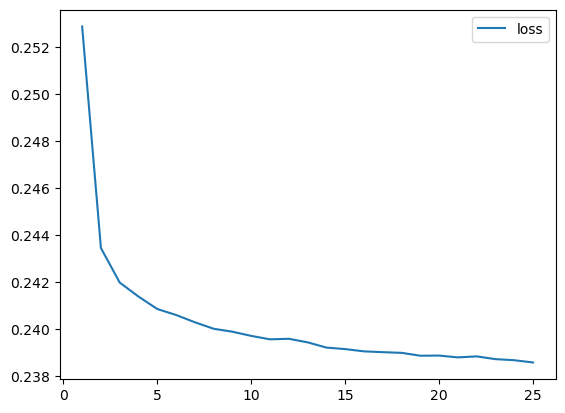

In [42]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(covid_model.history, index=range(1,len(covid_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

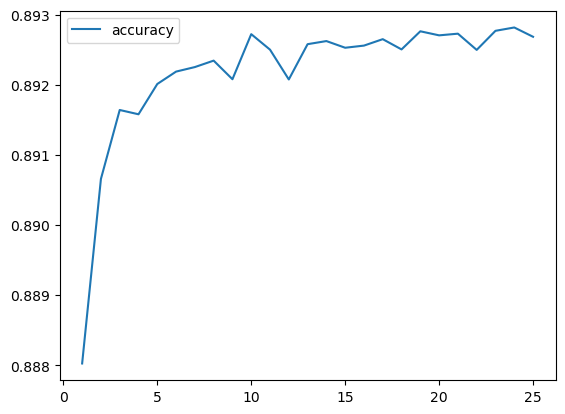

In [43]:
# Plot the accuracy
history_df.plot(y="accuracy")

#### =============================================================================================================

## Rank the Importance of Features

In [40]:
# Calculate feature importance from the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.93361856, 0.03383446, 0.00474295, 0.01672842, 0.01107561])

In [41]:
# We can sort the features by their importance.
sorted_df = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
sorted_df

[(0.9336185592611052, 'PNEUMONIA'),
 (0.03383446073762964, 'COPD'),
 (0.016728419011034914, 'CARDIOVASCULAR'),
 (0.01107560827766779, 'OBESITY'),
 (0.004742952712562405, 'ASTHMA')]

<AxesSubplot:title={'center':'Feature importances'}>

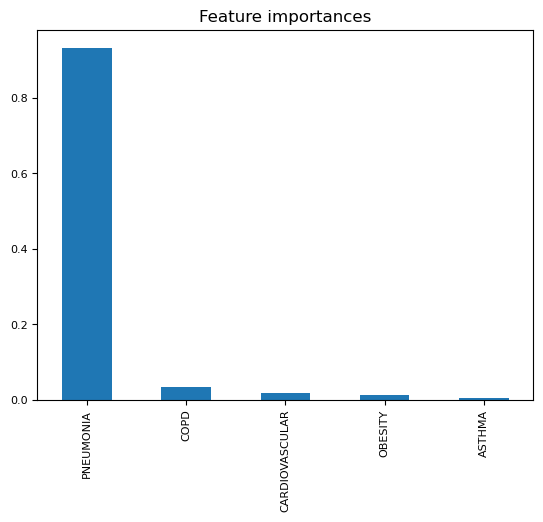

In [42]:
# Plot the feature importances of the forest
plt.title("Feature importances")
plt.yticks(fontsize=8,)
plt.xticks(fontsize=8,)
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(16)
   .plot(kind='bar')) 

#### ==================================================================================================================

### Underlying Disease-Features

In [73]:
# We can sort the features by their importance.
sorted_df = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
sorted_df

[(0.7009852595521454, 'PNEUMONIA'),
 (0.0992969348202316, 'DIABETES'),
 (0.09167954415419201, 'HIPERTENSION'),
 (0.03065140785688593, 'RENAL_CHRONIC'),
 (0.018929826105549143, 'COPD'),
 (0.013197112528039607, 'OBESITY'),
 (0.012992133625223848, 'OTHER_DISEASE'),
 (0.012092750664651687, 'CARDIOVASCULAR'),
 (0.010876317621527104, 'INMSUPR'),
 (0.00929871307155383, 'ASTHMA')]

<AxesSubplot:title={'center':'Feature importances'}>

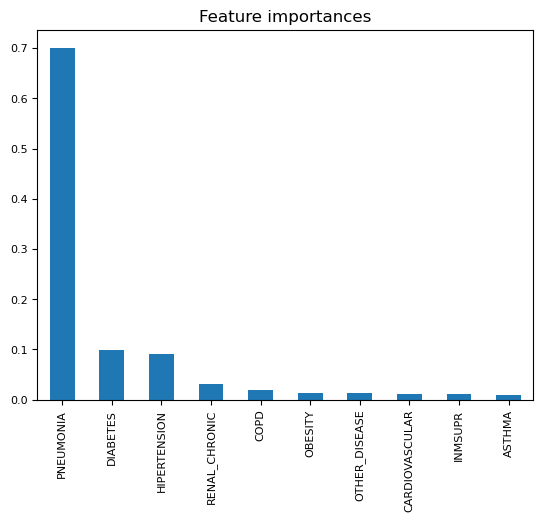

In [74]:
# Plot the feature importances of the forest
plt.title("Feature importances")
plt.yticks(fontsize=8,)
plt.xticks(fontsize=8,)
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(16)
   .plot(kind='bar')) 

#### ==========================================================================================================

### All Features

In [44]:
# Calculate feature importance from the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.00824615, 0.41383254, 0.36648175, 0.00643096, 0.0433037 ,
       0.01147357, 0.00728846, 0.0080932 , 0.03439034, 0.01137828,
       0.00986234, 0.0145392 , 0.01725307, 0.01088345, 0.03654299])

In [45]:
# We can sort the features by their importance.
sorted_df = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
sorted_df

[(0.4138325399670907, 'PNEUMONIA'),
 (0.36648174991867905, 'AGE'),
 (0.04330370499466151, 'DIABETES'),
 (0.03654299085520883, 'CLASIFFICATION_FINAL'),
 (0.03439033970550804, 'HIPERTENSION'),
 (0.01725307485614548, 'RENAL_CHRONIC'),
 (0.014539200465990654, 'OBESITY'),
 (0.011473568885559615, 'COPD'),
 (0.0113782760262327, 'OTHER_DISEASE'),
 (0.010883453261054808, 'TOBACCO'),
 (0.009862335069046348, 'CARDIOVASCULAR'),
 (0.008246145887711493, 'SEX'),
 (0.008093196792602673, 'INMSUPR'),
 (0.007288460339321352, 'ASTHMA'),
 (0.006430962975186872, 'PREGNANT')]

<AxesSubplot:title={'center':'Feature importances'}>

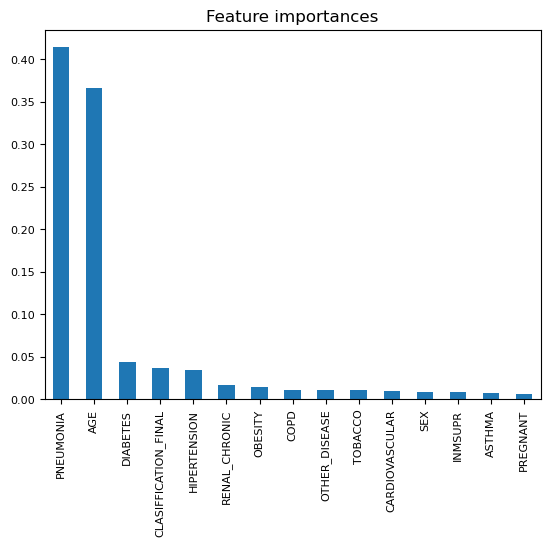

In [46]:
# Plot the feature importances of the forest
plt.title("Feature importances")
plt.yticks(fontsize=8,)
plt.xticks(fontsize=8,)
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(16)
   .plot(kind='bar')) 